In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris

In [120]:
iris = load_iris()

In [121]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [122]:
data = pd.DataFrame(iris.data, columns=[i.split(' (')[0].replace(' ','_') for i in iris.feature_names])
data['label'] = iris.target

Text(0, 0.5, 'sepal_width')

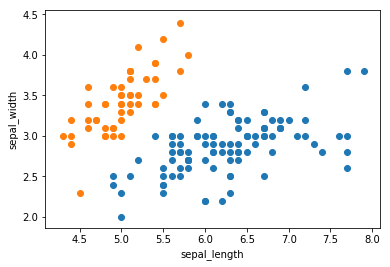

In [123]:
x, y = data.columns.tolist()[:2]
plt.scatter(data[data['label']!=0][x], data[data['label']!=0][y], label='0')
plt.scatter(data[data['label']==0][x], data[data['label']==0][y], label='1')
plt.xlabel(x)
plt.ylabel(y)

In [124]:
X = np.array(data[data.columns.tolist()[:2]])
y = np.array(data.iloc[:,-1])
y = np.array([1 if i==0 else -1 for i in y])

In [125]:
# 从上图可得，数据集线性可分
class PerceptronModel(object):
    def __init__(self, dataLen):
        self.w = np.ones(dataLen, dtype=np.float32)
        self.b = 0
        self.learingRate = 0.01
    
    def sign(self, x, w, b):
        return 1 if np.dot(x, w) + b >=0 else -1
    
    def fit(self, X_train, y_train):
        is_wrong = False
        while not is_wrong:
            wrong_cnt = 0
            for row in range(len(X_train)):
                X = X_train[row]
                y = y_train[row]
                if y * self.sign(X, self.w, self.b) <=0:
                    self.w = self.w + self.learingRate * np.dot(y, X)
                    self.b = self.b + self.learingRate * y
                    wrong_cnt += 1
            if not wrong_cnt: is_wrong = True

In [126]:
model = PerceptronModel(len(X[0]))
model.fit(X, y)

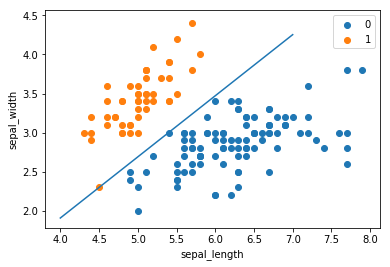

In [127]:
x_ = np.linspace(4, 7, 10)
y_ = -(model.w[0]*x_ + model.b)/model.w[1]
plt.plot(x_, y_)
xl, yl = data.columns.tolist()[:2]
plt.scatter(data[data['label']!=0][xl], data[data['label']!=0][yl], label='0')
plt.scatter(data[data['label']==0][xl], data[data['label']==0][yl], label='1')
plt.xlabel(xl)
plt.ylabel(yl)
plt.legend()

In [128]:
# 使用sklearn的感知器
from sklearn.linear_model import Perceptron
clf = Perceptron(fit_intercept=False,
                n_iter=100,
                shuffle=False)
clf.fit(X,y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=False, max_iter=None, n_iter=100, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=0, shuffle=False, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)

In [129]:
# 不同列的权重
clf.coef_

array([[-37.4,  61.1]])

In [130]:
# 截距
clf.intercept_

array([0.])

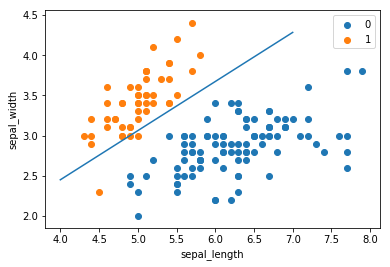

In [132]:
x_ = np.linspace(4, 7, 10)
y_ = -(clf.coef_[0][0]*x_ + clf.intercept_)/clf.coef_[0][1]
plt.plot(x_, y_)
xl, yl = data.columns.tolist()[:2]
plt.scatter(data[data['label']!=0][xl], data[data['label']!=0][yl], label='0')
plt.scatter(data[data['label']==0][xl], data[data['label']==0][yl], label='1')
plt.xlabel(xl)
plt.ylabel(yl)
plt.legend()